In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns

In [4]:
df=pd.read_excel("C:/Users/USER/Downloads/iti dataanalyst project/iti dataanalyst project/Nashville Housing Data for Data Cleaning.xlsx")

In [5]:
df.head()

UniqueID          ParcelID        LandUse  \
0       2045  007 00 0 125.00  SINGLE FAMILY   
1      16918  007 00 0 130.00  SINGLE FAMILY   
2      54582  007 00 0 138.00  SINGLE FAMILY   
3      43070  007 00 0 143.00  SINGLE FAMILY   
4      22714  007 00 0 149.00  SINGLE FAMILY   

                      PropertyAddress   SaleDate  SalePrice    LegalReference  \
0  1808  FOX CHASE DR, GOODLETTSVILLE 2013-04-09     240000  20130412-0036474   
1  1832  FOX CHASE DR, GOODLETTSVILLE 2014-06-10     366000  20140619-0053768   
2  1864 FOX CHASE  DR, GOODLETTSVILLE 2016-09-26     435000  20160927-0101718   
3  1853  FOX CHASE DR, GOODLETTSVILLE 2016-01-29     255000  20160129-0008913   
4  1829  FOX CHASE DR, GOODLETTSVILLE 2014-10-10     278000  20141015-0095255   

  SoldAsVacant                           OwnerName  \
0           No           FRAZIER, CYRENTHA LYNETTE   
1           No             BONER, CHARLES & LESLIE   
2           No           WILSON, JAMES E. & JOANNE   
3           No            BAKER, JAY K. & SUSAN E.   
4           No  POST, CHRISTOPHER M. & SAMANTHA C.   

                             OwnerAddress  Acreage                TaxDistrict  \
0  1808  FOX CHASE DR, GOODLETTSVILLE, TN      2.3  GENERAL SERVICES DISTRICT   
1  1832  FOX CHASE DR, GOODLETTSVILLE, TN      3.5  GENERAL SERVICES DISTRICT   
2  1864  FOX CHASE DR, GOODLETTSVILLE, TN      2.9  GENERAL SERVICES DISTRICT   
3  1853  FOX CHASE DR, GOODLETTSVILLE, TN      2.6  GENERAL SERVICES DISTRICT   
4  1829  FOX CHASE DR, GOODLETTSVILLE, TN      2.0  GENERAL SERVICES DISTRICT   

   LandValue  BuildingValue  TotalValue  YearBuilt  Bedrooms  FullBath  \
0    50000.0       168200.0    235700.0     1986.0       3.0       3.0   
1    50000.0       264100.0    319000.0     1998.0       3.0       3.0   
2    50000.0       216200.0    298000.0     1987.0       4.0       3.0   
3    50000.0       147300.0    197300.0     1985.0       3.0       3.0   
4    50000.0       152300.0    202300.0     1984.0       4.0       3.0   

   HalfBath  
0       0.0  
1       2.0  
2       0.0  
3       0.0  
4       0.0

In [6]:
df.shape

(56477, 19)

In [7]:
list(df.columns)

['UniqueID ',
 'ParcelID',
 'LandUse',
 'PropertyAddress',
 'SaleDate',
 'SalePrice',
 'LegalReference',
 'SoldAsVacant',
 'OwnerName',
 'OwnerAddress',
 'Acreage',
 'TaxDistrict',
 'LandValue',
 'BuildingValue',
 'TotalValue',
 'YearBuilt',
 'Bedrooms',
 'FullBath',
 'HalfBath']

In [8]:
df.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

In [9]:
z=df.dropna(axis=0,thresh=len(df.columns)-2)
z.dropna(subset=['PropertyAddress'],inplace=True)
z=z.drop(['OwnerName','OwnerAddress','UniqueID ','ParcelID','TotalValue'],axis=1)

C:\Users\USER\AppData\Local\Temp/ipykernel_13492/4288634272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(subset=['PropertyAddress'],inplace=True)


In [10]:
z.shape

(24250, 14)

In [11]:
z.isnull().sum()

LandUse              0
PropertyAddress      0
SaleDate             0
SalePrice            0
LegalReference       0
SoldAsVacant         0
Acreage              0
TaxDistrict          0
LandValue            0
BuildingValue        0
YearBuilt          107
Bedrooms           111
FullBath             1
HalfBath           132
dtype: int64

In [12]:
pd.set_option('display.max_rows',None)

In [13]:
z[['PropertyAddress','TaxDistrict']]

PropertyAddress                TaxDistrict
0              1808  FOX CHASE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
1              1832  FOX CHASE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
2              1864 FOX CHASE  DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
3              1853  FOX CHASE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
4              1829  FOX CHASE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
5              1821  FOX CHASE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
6                  2005  SADIE LN, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
7              1917 GRACELAND  DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
8           1428  SPRINGFIELD HWY, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
9           1420  SPRINGFIELD HWY, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
13              629  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
14              633  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
15              637  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
16                 1976 SADIE  LN, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
17              644  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
18              1921  NORMERLE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
19              1916  NORMERLE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
20             2050  GRACELAND DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
21             2034  GRACELAND DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
22                 811  BENTON CT, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
23             331  VIEW RIDGE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
24             361  VIEW RIDGE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
26     8154  OLD SPRINGFIELD PIKE, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
27     8158  OLD SPRINGFIELD PIKE, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
28     8136  OLD SPRINGFIELD PIKE, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
29          1334  SPRINGFIELD HWY, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
30          1412  SPRINGFIELD HWY, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
31              612  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
32            2013 SUNNYSLOPE  LN, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
33             600  SUNNYSLOPE CT, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
34             604 SUNNYSLOPE  CT, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
35             609  SUNNYSLOPE CT, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
36              621  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
37              613  GAYLEMORE DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
38                   3128  UNION HILL RD, JOELTON  GENERAL SERVICES DISTRICT
39                         7515 GARY  RD, JOELTON  GENERAL SERVICES DISTRICT
40                       7620 GERALD  DR, JOELTON  GENERAL SERVICES DISTRICT
41                       7624  GERALD DR, JOELTON  GENERAL SERVICES DISTRICT
42                       7628  GERALD DR, JOELTON  GENERAL SERVICES DISTRICT
43                     3113  MILLIKEN DR, JOELTON  GENERAL SERVICES DISTRICT
44                     3113  MILLIKEN DR, JOELTON  GENERAL SERVICES DISTRICT
45                     3117  MILLIKEN DR, JOELTON  GENERAL SERVICES DISTRICT
46                       3107  MARGIE DR, JOELTON  GENERAL SERVICES DISTRICT
47                       3124  MARGIE DR, JOELTON  GENERAL SERVICES DISTRICT
48            2466  UNION HILL RD, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
49            7221  APPLE VIEW DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
50            7104  LAMA TERRA DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
51            7143  LAMA TERRA DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
52            7175  LAMA TERRA DR, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
53           6912  RIDGERUNNER CT, GOODLETTSVILLE  GENERAL SERVICES DISTRICT
54              334  MONCRIEF AVE, GOODLETTSVILLE     CITY OF GOODLETTSVILLE
55              330  MONCRIEF 

In [14]:
z['YearBuilt'].fillna(method='ffill',inplace=True)
z['Bedrooms'].fillna(z['Bedrooms'].mode()[0],inplace=True)
z['FullBath'].fillna(z['FullBath'].mode()[0],inplace=True)
z['HalfBath'].fillna(z['HalfBath'].mode()[0],inplace=True)
z[['P_addresse', 'P_city']] = z.PropertyAddress.str.split(", ", expand = True)
z.replace(to_replace="VACANT RES LAND",value="VACANT RESIDENTIAL LAND",inplace=True)
z.replace(to_replace="N",value="No",inplace=True)
z.replace(to_replace="Y",value="Yes",inplace=True)

<AxesSubplot: >

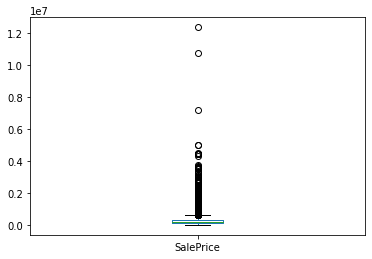

In [15]:
z.boxplot(column =['SalePrice'], grid = False ,figsize=(20,20))

In [16]:
if list(z.duplicated()) ==True:
    print("there is duplication")
else:
    print("there is nothing")

there is nothing


In [17]:
z['SalePrice'].count()

24250

In [18]:
z_new1=z[['P_city','SalePrice']]

In [19]:
z_new1['SalePrice'].quantile(0.01)

26593.59

In [20]:
z_new1['SalePrice'].quantile(0.928)

624301.4400000024

In [21]:
z_new_win=winsorize(z_new1["SalePrice"],(0.01,0.072))
print(z_new_win.count())

24250


<AxesSubplot: >

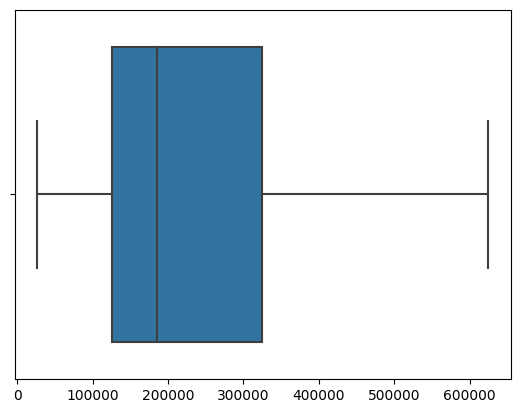

In [22]:
sns.boxplot(x=z_new_win)

In [23]:
z.drop('SalePrice',axis=1,inplace=True)
z.insert(1,'SalePrice_new',z_new_win)


In [24]:
pd.reset_option('display.max_rows')

In [25]:
z.head(100)

LandUse  SalePrice_new                     PropertyAddress  \
0    SINGLE FAMILY         240000  1808  FOX CHASE DR, GOODLETTSVILLE   
1    SINGLE FAMILY         366000  1832  FOX CHASE DR, GOODLETTSVILLE   
2    SINGLE FAMILY         435000  1864 FOX CHASE  DR, GOODLETTSVILLE   
3    SINGLE FAMILY         255000  1853  FOX CHASE DR, GOODLETTSVILLE   
4    SINGLE FAMILY         278000  1829  FOX CHASE DR, GOODLETTSVILLE   
..             ...            ...                                 ...   
101  SINGLE FAMILY         130000      205  FANNIN DR, GOODLETTSVILLE   
102  SINGLE FAMILY         179000      207 FANNIN  DR, GOODLETTSVILLE   
103  SINGLE FAMILY         172000      108 FANNIN  DR, GOODLETTSVILLE   
104  SINGLE FAMILY         150000        304 DORR  DR, GOODLETTSVILLE   
105  SINGLE FAMILY         172900      305  FANNIN DR, GOODLETTSVILLE   

      SaleDate    LegalReference SoldAsVacant  Acreage  \
0   2013-04-09  20130412-0036474           No     2.30   
1   2014-06-10  20140619-0053768           No     3.50   
2   2016-09-26  20160927-0101718           No     2.90   
3   2016-01-29  20160129-0008913           No     2.60   
4   2014-10-10  20141015-0095255           No     2.00   
..         ...               ...          ...      ...   
101 2014-10-24  20141028-0099422           No     0.96   
102 2016-10-20  20161025-0112573           No     0.96   
103 2016-06-06  20160606-0056892           No     0.89   
104 2016-06-13  20160614-0060220           No     1.04   
105 2015-05-21  20150528-0049256           No     0.97   

                   TaxDistrict  LandValue  BuildingValue  YearBuilt  Bedrooms  \
0    GENERAL SERVICES DISTRICT    50000.0       168200.0     1986.0       3.0   
1    GENERAL SERVICES DISTRICT    50000.0       264100.0     1998.0       3.0   
2    GENERAL SERVICES DISTRICT    50000.0       216200.0     1987.0       4.0   
3    GENERAL SERVICES DISTRICT    50000.0       147300.0     1985.0       3.0   
4    GENERAL SERVICES DISTRICT    50000.0       152300.0     1984.0       4.0   
..                         ...        ...            ...        ...       ...   
101     CITY OF GOODLETTSVILLE    28100.0        82400.0     1960.0       4.0   
102     CITY OF GOODLETTSVILLE    28100.0        88900.0     1960.0       2.0   
103     CITY OF GOODLETTSVILLE    28100.0        88400.0     1962.0       3.0   
104     CITY OF GOODLETTSVILLE    28100.0        65300.0     1961.0       2.0   
105     CITY OF GOODLETTSVILLE    28100.0        66200.0     1960.0       3.0   

     FullBath  HalfBath          P_addresse          P_city  
0         3.0       0.0  1808  FOX CHASE DR  GOODLETTSVILLE  
1         3.0       2.0  1832  FOX CHASE DR  GOODLETTSVILLE  
2         3.0       0.0  1864 FOX CHASE  DR  GOODLETTSVILLE  
3         3.0       0.0  1853  FOX CHASE DR  GOODLETTSVILLE  
4         3.0       0.0  1829  FOX CHASE DR  GOODLETTSVILLE  
..        ...       ...                 ...             ...  
101       1.0       1.0      205  FANNIN DR  GOODLETTSVILLE  
102       1.0       1.0      207 FANNIN  DR  GOODLETTSVILLE  
103       1.0       0.0      108 FANNIN  DR  GOODLETTSVILLE  
104       1.0       0.0        304 DORR  DR  GOODLETTSVILLE  
105       1.0       0.0      305  FANNIN DR  GOODLETTSVILLE  

[100 rows x 16 columns]

<AxesSubplot: >

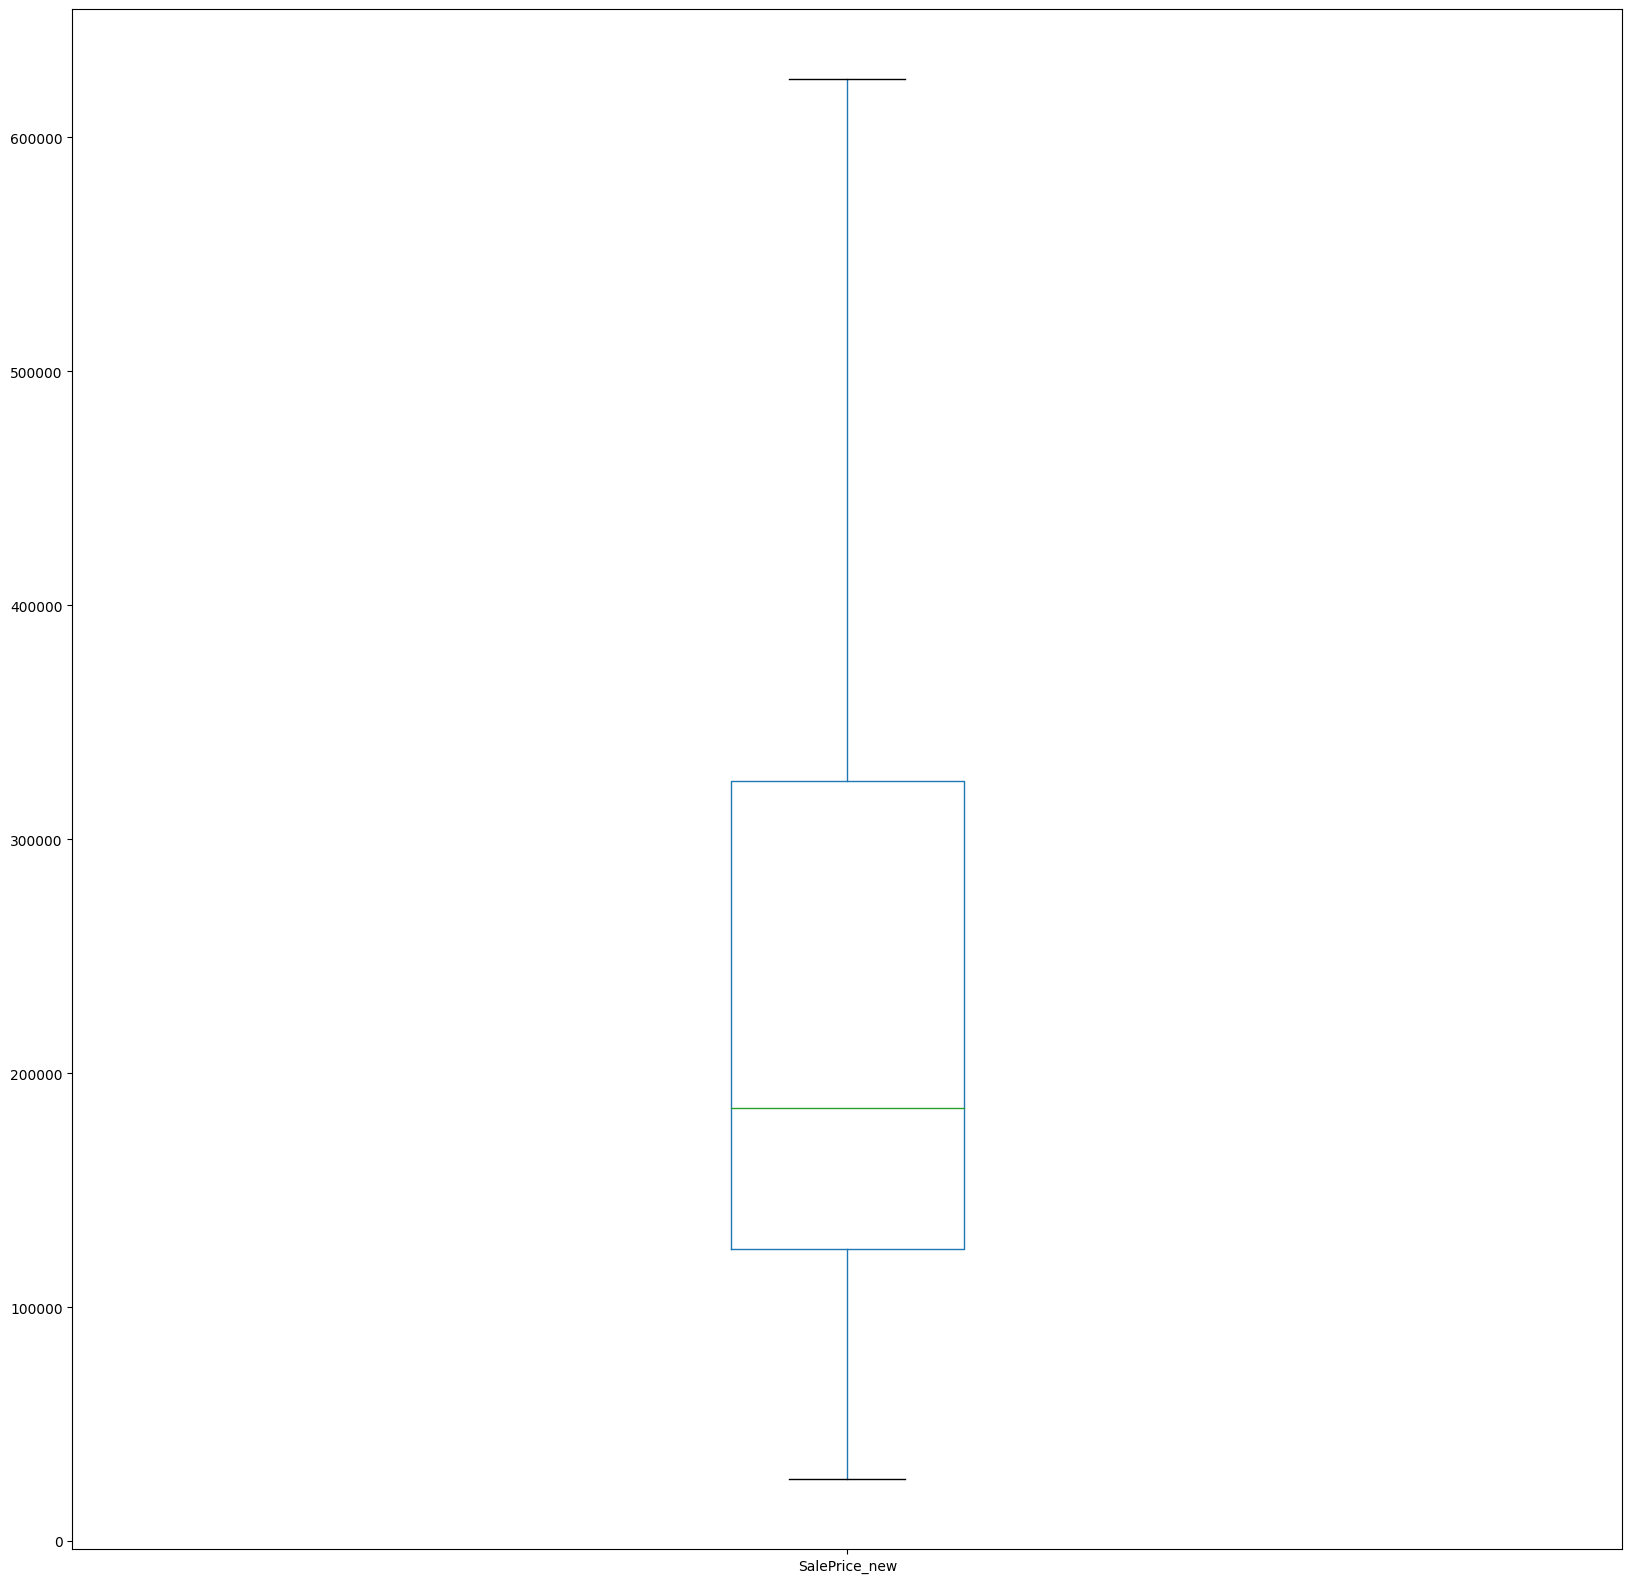

In [27]:
z.boxplot(column =['SalePrice_new'], grid = False ,figsize=(20,20))

In [28]:
z.to_csv('afterCleaning.csv', encoding='utf-8')